In [2]:
%matplotlib inline
import pandas as pd, datetime as dt
import collections
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import glob, os

## PN vs CO2

In [3]:
files = glob.glob('*C.xlsx')                                     # read lab files (-7C) 

dic = {}                                                            # empty dictionary lab test

i = 1
for each in files:
  
    %time df = pd.read_excel(each, sheetname=1, header=0)                          # read the proper sheets within each file

    v = df['DACtrl_ActualSpeed\n[kph]']                                # speed 
    t_s = len(df.index)                                                # time(s)
    t_m = t_s/60                                                       # time (min)
    t_h = t_s/3600                                                     # time (h)
    v_mean = v.mean()                                                  # speed means
    d = v_mean * t_h                                                   # distance means

    CO2 = df['c_CO2_Dil_g_vec\n[grams]']
    CO2_sum = CO2.sum()
    CO2km = CO2_sum/d                                                    # CO2 per km 
    #CO2pct = CO2km*100/CO2_TA                                            # emissions as % of type approval (98 g/km)

    flow_gas = df['c_Vmix_vec\n[m3/min]']                               # flow of gas mixture [m3/min]
    flow_avg = flow_gas.sum()/t_s                                       # average in m3/min
    vol_gas = flow_avg * t_m                                            # total volume of gas mixture (m3)
    vol_gas_cc = vol_gas * 1e6                                          # total volume of gas mixture (cm3)

    PN = df["Counter\n[cpcc]"]                                         # column of PN flow in #/cm3
    PN_sum = PN.sum()                                                  
    PN_avg = PN_sum / t_s                                               # average of flow in #/cm3
    
    PN_total = PN_avg * vol_gas_cc                                      # total emitted in #
    PN_total_km = PN_total / d                                          # total emission in #/km
    
    key = each.split('dal_')[1].split('.x')[0]                             # shortening the titles of the files
    
    key = str(i) + "." + str(key)                                        # numbering the files
    dic[key] = [CO2km, vol_gas_cc, t_s, t_m, d, PN_sum, PN_avg, PN_total_km] # save means in the dictionary 
    i = i+1

Wall time: 1.33 s
Wall time: 1.09 s
Wall time: 1.95 s
Wall time: 1.06 s
Wall time: 2.2 s
Wall time: 1.6 s
Wall time: 1.06 s
Wall time: 1.05 s
Wall time: 2.01 s
Wall time: 1.6 s
Wall time: 1.61 s
Wall time: 1.96 s
Wall time: 1.6 s
Wall time: 1.63 s
Wall time: 1.61 s
Wall time: 1.04 s
Wall time: 1.05 s
Wall time: 1.31 s
Wall time: 989 ms
Wall time: 1.16 s
Wall time: 1.69 s
Wall time: 1.05 s


In [4]:
lab = pd.DataFrame()                                     # convert dic to dataframe
lab = lab.from_dict(dic, orient='index')             # proper order
lab['ind2'] = ['01','05','08','04','07','08','03','03','08','09',             # proper order
               '09','10','09','07','08','02','06','04','01','05','02','06']
lab.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','ind2']               # headers
lab = lab.sort_values('ind2')

In [5]:
lab['test'] = ['N_CD_23','N_CD_23','N+10%_CD_23','N+10%_CD_23','N_CD_10','N_CD_10',
               'N_CD_30','N_CD_30','N_HT_23','N_HT_23','N_HT_AC18+L_23','N_HT_AC18+L_23',
               'W_CD_23','W_CD_23','W_HT_23','W_HT_23','W_HT_23','W_HT_23',
               'W_LO-7_CD_-7','W_LO-7_CD_-7','W_LO-7_CD_-7','W_LO-7_HT_-7']

lab.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','ind2','test']
lab

,CO2km,vol_gas_cc,t_s,t_m,d,PN_sum,PN_avg,PN_total_km,ind2,test
1.DIL_NEDC_COLD_FWD-sync_23°C,122.380762,2.276243e+08,1181,19.683333,10.794890,7.135596e+04,60.419952,1.274033e+09,01,N_CD_23
19.DIL_NEDC_COLD_FWD-sync_23°C,123.602547,2.130410e+08,1118,18.633333,9.868432,1.048622e+05,93.794448,2.024847e+09,01,N_CD_23
16.DIL_NEDC+10%Veloc_COLD_FWD-sync_23°C,126.608577,2.283737e+08,1181,19.683333,11.929549,1.311839e+05,111.078657,2.126438e+09,02,N+10%_CD_23
21.DIL_NEDC+10%Veloc_COLD_FWD-sync_23°C,125.110670,2.256924e+08,1181,19.683333,11.902973,2.512537e+05,212.746583,4.033890e+09,02,N+10%_CD_23
7.DIL_NEDC_COLD_FWD-sync_10°C,133.021860,2.267507e+08,1181,19.683333,10.842563,2.185416e+06,1850.479312,3.869910e+10,03,N_CD_10
8.DIL_NEDC_COLD_FWD-sync_10°C,130.614367,2.263693e+08,1180,19.666667,10.797272,1.101875e+06,933.792228,1.957735e+10,03,N_CD_10
4.DIL_NEDC_COLD_FWD-sync_30°C,120.924973,2.272986e+08,1181,19.683333,10.889853,1.621111e+06,1372.659297,2.865086e+10,04,N_CD_30
18.DIL_NEDC_COLD_FWD-sync_30°C,117.289548,2.279671e+08,1181,19.683333,10.797776,1.312541e+05,111.138105,2.346394e+09,04,N_CD_30
2.DIL_NEDC_HOT_FWD-sync_23°C,110.283987,2.276561e+08,1181,19.683333,10.761756,7.068691e+04,59.853435,1.266150e+09,05,N_HT_23
20.DIL_NEDC_HOT_FWD-sync_23°C,115.314096,2.253235e+08,1181,19.683333,10.819475,7.218785e+04,61.124342,1.272959e+09,05,N_HT_23


In [6]:
name = lab.groupby(lab.ind2).mean()#.reset_index()#drop = True)
name['test'] = ['N_CD_23','N+10%_CD_23','N_CD_10','N_CD_30','N_HT_23',
                'N_HT_AC18+L_23','W_CD_23','W_HT_23','W_LO-7_CD_-7','W_LO-7_HT_-7']
name.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','test']

name

,CO2km,vol_gas_cc,t_s,t_m,d,PN_sum,PN_avg,PN_total_km,test
ind2,,,,,,,,,
01,122.991654,2.203327e+08,1149.5,19.158333,10.331661,8.810908e+04,77.107200,1.649440e+09,N_CD_23
02,125.859623,2.270331e+08,1181.0,19.683333,11.916261,1.912188e+05,161.912620,3.080164e+09,N+10%_CD_23
03,131.818114,2.265600e+08,1180.5,19.675000,10.819918,1.643645e+06,1392.135770,2.913822e+10,N_CD_10
04,119.107261,2.276329e+08,1181.0,19.683333,10.843814,8.761824e+05,741.898701,1.549862e+10,N_CD_30
05,112.799042,2.264898e+08,1181.0,19.683333,10.790616,7.143738e+04,60.488888,1.269555e+09,N_HT_23
06,134.809943,2.269346e+08,1180.5,19.675000,10.830509,1.064064e+05,90.149111,1.891559e+09,N_HT_AC18+L_23
07,135.778850,3.485797e+08,1801.0,30.016667,23.210895,2.399359e+07,13322.370008,1.993013e+11,W_CD_23
08,129.394423,3.473928e+08,1801.0,30.016667,23.209443,2.001896e+05,111.154700,1.660123e+09,W_HT_23
09,158.362965,3.486420e+08,1801.0,30.016667,23.253802,1.582988e+07,8789.491965,1.306877e+11,W_LO-7_CD_-7


## Plot all tests (review the tests because some show 1000 times higher PN - out of limits)

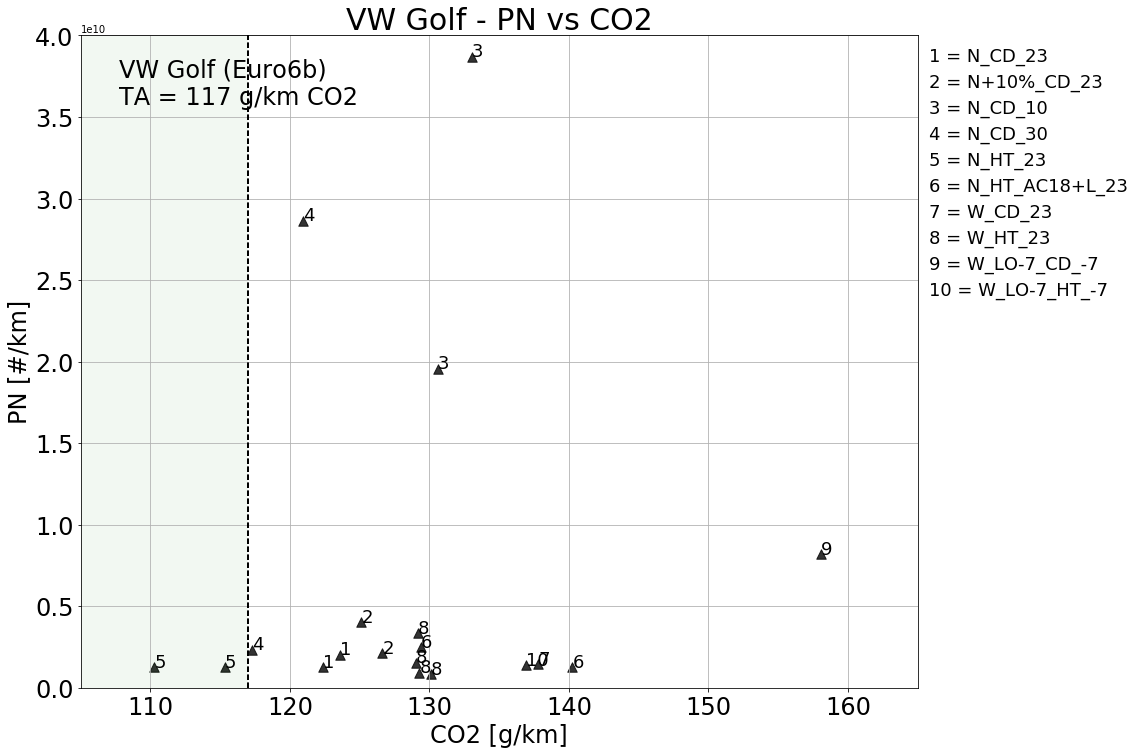

In [12]:
ax = lab.plot.scatter('CO2km', 'PN_total_km', marker="^", alpha=.8 ,s = 90, c = 'black', 
                      figsize=(15, 12), grid ='on')
#plt.set_size_inches()

#legend = ('LAB')
#plt.legend(legend, fontsize = 16, loc = 'upper right')

fontsize = 24
plt.ylabel('PN [#/km]', fontsize = fontsize)
plt.xlabel('CO2 [g/km]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.title('VW Golf - PN vs CO2', fontsize = 30)
plt.axis([105,165,0,4*1e10])                              # THIS DOESN'T SHOW ALL TESTS! plot higher orders of magnitude

for i, txt in enumerate(lab.ind2):
    if i<21:
        ax.annotate(txt.split('0')[1], (lab.CO2km.iat[i],lab.PN_total_km.iat[i]),
                    ha = 'left', fontsize = 18, clip_on=True)#, rotation = 30)    # clip_on is to avoid the plot to crash
    else:                                                                         # when some points are out of limits of axes
        ax.annotate(txt, (lab.CO2km.iat[i],lab.PN_total_km.iat[i]), 
                    ha = 'left', fontsize = 18, clip_on=True)
        

# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_COMP_.iat[i],road.PN_COMP.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_URB_.iat[i],road.PN_URB.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_RUR_.iat[i],road.PN_RUR.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_MOT_.iat[i],road.PN_MOT.iat[i]), 
#                 ha = 'left', fontsize = 14)   
i=1
for each in name.test:
    plt.gcf().text(0.91, 0.88 - 0.03*i, str(i) + ' = ' +  each, fontsize=18)  # 
    i = i+1

# i = 0
# for each in road.index:
#     plt.gcf().text(0.91, 0.55 - 0.03*i, road.ALPH[i] + ' = ' + each.split('36_')[1].split('_2017')[0], fontsize=18)
#     i = i+1
    
plt.gcf().text(0.16, 0.8, str('VW Golf (Euro6b) \nTA = 117 g/km CO2'), fontsize=24)
#plt.gcf().text(0.61, 0.16 , str('PN limit = 6x10^11 #/km'), fontsize=24)
#plt.gcf().text(0.66, 0.23 , str('PN conf. factor = 1.5'), fontsize=24)

plt.axvline(x=117, color='k', linestyle='--', linewidth=2 )
# plt.axhline(y=6e11, color='k', linestyle='--', linewidth=2 )
# plt.axhline(y=6e11*1.5, color='k', linestyle='--', linewidth=2 )

# plt.axhspan(6e11, 6e11*1.5 , facecolor='yellow', alpha=0.1)
# plt.axhspan(6e11*1.5, 7e12 , facecolor='0.2', alpha=0.1)
plt.axvspan(100, 117, facecolor='green', alpha=0.05)

## Plot avg of repeated tests

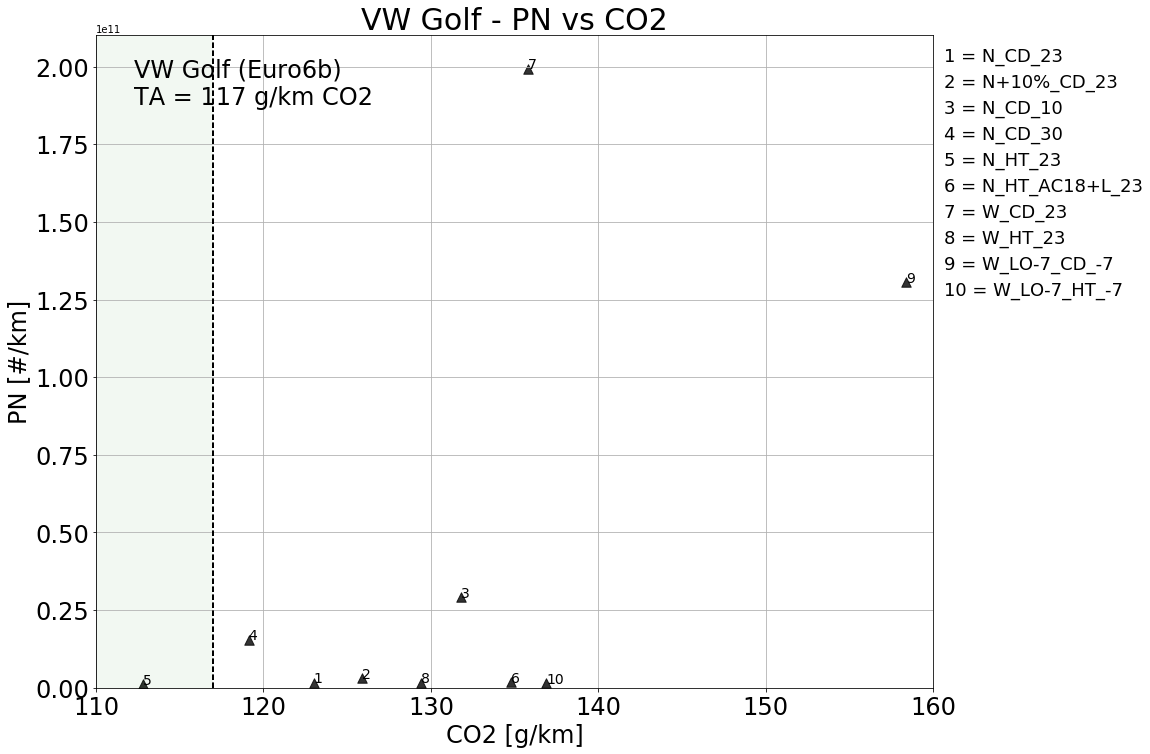

In [15]:
ax = name.plot.scatter('CO2km', 'PN_total_km', marker="^", alpha=.8 ,s = 90, c = 'black', 
                      figsize=(15, 12), grid ='on')
#plt.set_size_inches()

#legend = ('LAB')
#plt.legend(legend, fontsize = 16, loc = 'upper right')

fontsize = 24
plt.ylabel('PN [#/km]', fontsize = fontsize)
plt.xlabel('CO2 [g/km]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.title('VW Golf - PN vs CO2', fontsize = 30)
plt.axis([110,160,0,2.1*1e11])                              # THIS DOESN'T SHOW ALL TESTS! plot higher orders of magnitude

for i, txt in enumerate(name.test):
    ax.annotate(i+1, (name.CO2km.iat[i],name.PN_total_km.iat[i]),
                ha = 'left', fontsize = 14, clip_on=True)#, rotation = 30)
    
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_COMP_.iat[i],road.PN_COMP.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_URB_.iat[i],road.PN_URB.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_RUR_.iat[i],road.PN_RUR.iat[i]), 
#                 ha = 'left', fontsize = 14)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_MOT_.iat[i],road.PN_MOT.iat[i]), 
#                 ha = 'left', fontsize = 14)   
i=1
for each in name.test:
    plt.gcf().text(0.91, 0.88 - 0.03*i, str(i) + ' = ' +  each, fontsize=18)  # 
    i = i+1

# i = 0
# for each in road.index:
#     plt.gcf().text(0.91, 0.55 - 0.03*i, road.ALPH[i] + ' = ' + each.split('36_')[1].split('_2017')[0], fontsize=18)
#     i = i+1
    
plt.gcf().text(0.16, 0.8, str('VW Golf (Euro6b) \nTA = 117 g/km CO2'), fontsize=24)
#plt.gcf().text(0.61, 0.16 , str('PN limit = 6x10^11 #/km'), fontsize=24)
#plt.gcf().text(0.66, 0.23 , str('PN conf. factor = 1.5'), fontsize=24)

plt.axvline(x=117, color='k', linestyle='--', linewidth=2 )
# plt.axhline(y=6e11, color='k', linestyle='--', linewidth=2 )
# plt.axhline(y=6e11*1.5, color='k', linestyle='--', linewidth=2 )

# plt.axhspan(6e11, 6e11*1.5 , facecolor='yellow', alpha=0.1)
# plt.axhspan(6e11*1.5, 7e12 , facecolor='0.2', alpha=0.1)
plt.axvspan(100, 117, facecolor='green', alpha=0.05)